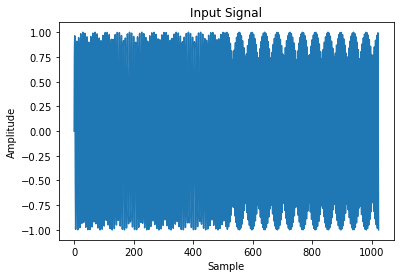

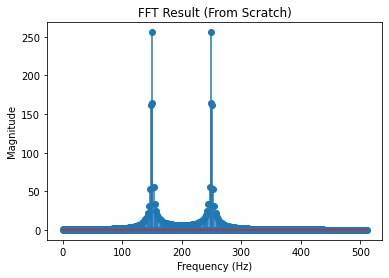

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Fungsi untuk membuat sinyal input
def generate_signal(fs, n_points):
    x1 = np.zeros(n_points)
    for n in range(n_points):
        if n <= 511:
            x1[n] = np.sin(2 * np.pi * n * 150 / fs)
        else:
            x1[n] = np.sin(2 * np.pi * n * 250 / fs)
    return x1

# Fungsi FFT menggunakan algoritma Cooley-Tukey (rekursif)
def fft(x):
    N = len(x)
    if N <= 1:
        return x
    even = fft(x[0::2])
    odd = fft(x[1::2])
    T = [complex(math.cos(-2 * math.pi * k / N), math.sin(-2 * math.pi * k / N)) * odd[k] for k in range(N // 2)]
    return [even[k] + T[k] for k in range(N // 2)] + [even[k] - T[k] for k in range(N // 2)]

# Fungsi untuk menghitung magnitude dari FFT
def compute_magnitude(fft_result):
    return [abs(value) for value in fft_result]

# Fungsi untuk menghitung frekuensi FFT dari panjang sinyal dan frekuensi sampling
def compute_frequencies(N, fs):
    return [(fs * k) / N for k in range(N // 2)]

# Fungsi untuk melakukan zero padding agar panjang sinyal menjadi pangkat dua
def zero_padding(x, target_len):
    padded_x = np.zeros(target_len)
    padded_x[:len(x)] = x
    return padded_x

# Fungsi untuk melakukan FFT dan memplot hasilnya
def perform_fft(signal, fs):
    # Zero padding agar panjang sinyal pangkat dua
    N = 1
    while N < len(signal):
        N *= 2
    padded_signal = zero_padding(signal, N)

    # Lakukan FFT from scratch
    fft_result = fft(padded_signal)
    
    # Hitung magnitudo
    magnitude = compute_magnitude(fft_result)

    # Hitung frekuensi untuk hasil FFT
    freqs = compute_frequencies(len(padded_signal), fs)

    # Plot hasil FFT
    plt.stem(freqs, magnitude[:len(freqs)], use_line_collection=True)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.title('FFT Result (From Scratch)')
    plt.show()

# Fungsi utama untuk memulai proses
def main():
    fs = 1024  # Frekuensi sampling
    n_points = 1024  # Jumlah titik data
    
    # Buat sinyal input
    signal = generate_signal(fs, n_points)
    
    # Plot sinyal input
    plt.plot(signal)
    plt.title("Input Signal")
    plt.xlabel("Sample")
    plt.ylabel("Amplitude")
    plt.show()
    
    # Lakukan FFT
    perform_fft(signal, fs)

if __name__ == "__main__":
    main()


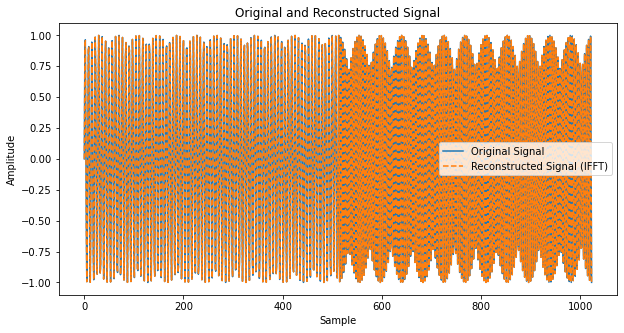

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Fungsi IFFT menggunakan algoritma Cooley-Tukey (rekursif)
def ifft(X):
    N = len(X)
    if N <= 1:
        return X

    # Konjugasi dari input (membalikkan tanda bagian imajiner)
    X_conj = [complex(val.real, -val.imag) for val in X]

    # Gunakan algoritma FFT pada hasil konjugasi
    fft_result = fft(X_conj)

    # Konjugasi hasil FFT dan bagi dengan N (panjang sinyal)
    ifft_result = [complex(val.real, -val.imag) / N for val in fft_result]

    return ifft_result

# Fungsi untuk membuat sinyal input
def generate_signal(fs, n_points):
    x1 = np.zeros(n_points)
    for n in range(n_points):
        if n <= 511:
            x1[n] = np.sin(2 * np.pi * n * 150 / fs)
        else:
            x1[n] = np.sin(2 * np.pi * n * 250 / fs)
    return x1

# Fungsi untuk melakukan zero padding agar panjang sinyal menjadi pangkat dua
def zero_padding(x, target_len):
    padded_x = np.zeros(target_len)
    padded_x[:len(x)] = x
    return padded_x

# Fungsi untuk melakukan FFT dan IFFT, serta memplot hasilnya
def perform_ifft_from_fft(fft_result, original_signal):
    # Lakukan IFFT untuk merekonstruksi sinyal
    ifft_result = ifft(fft_result)

    # Plot sinyal asli dan sinyal hasil IFFT
    plt.figure(figsize=(10, 5))
    plt.plot(original_signal, label="Original Signal", linestyle='-')
    plt.plot([val.real for val in ifft_result], label="Reconstructed Signal (IFFT)", linestyle='--')
    plt.title('Original and Reconstructed Signal')
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.show()

# Fungsi utama untuk memulai proses
def main():
    fs = 1024  # Frekuensi sampling
    n_points = 1024  # Jumlah titik data
    
    # Buat sinyal input
    signal = generate_signal(fs, n_points)

    # Lakukan FFT
    fft_result = fft(signal)

    # Lakukan IFFT berdasarkan hasil FFT untuk merekonstruksi sinyal
    perform_ifft_from_fft(fft_result, signal)

if __name__ == "__main__":
    main()
